In [34]:
import pickle
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam,RMSprop
from keras.models import Model

In [35]:
with open("pickle_data/images.p","rb") as f:
  images = pickle.load(f)

with open("pickle_data/labels.p","rb") as f:
  labels = pickle.load(f)

In [36]:
print(images.shape)
print(labels.shape)
print(set(labels))

(594, 100, 100)
(594,)
{'Malay', 'Durga', 'Bijay-ID-1000', 'sambit', 'Ashutosh', 'Arnab'}


In [37]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [38]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [39]:
n_classes = len(set(labels))
label_mapping = le.inverse_transform(np.arange(n_classes))
print(label_mapping)

['Arnab' 'Ashutosh' 'Bijay-ID-1000' 'Durga' 'Malay' 'sambit']


In [40]:
for i in range(n_classes):
  print("person {} is {}".format(i,le.inverse_transform([i])))

person 0 is ['Arnab']
person 1 is ['Ashutosh']
person 2 is ['Bijay-ID-1000']
person 3 is ['Durga']
person 4 is ['Malay']
person 5 is ['sambit']


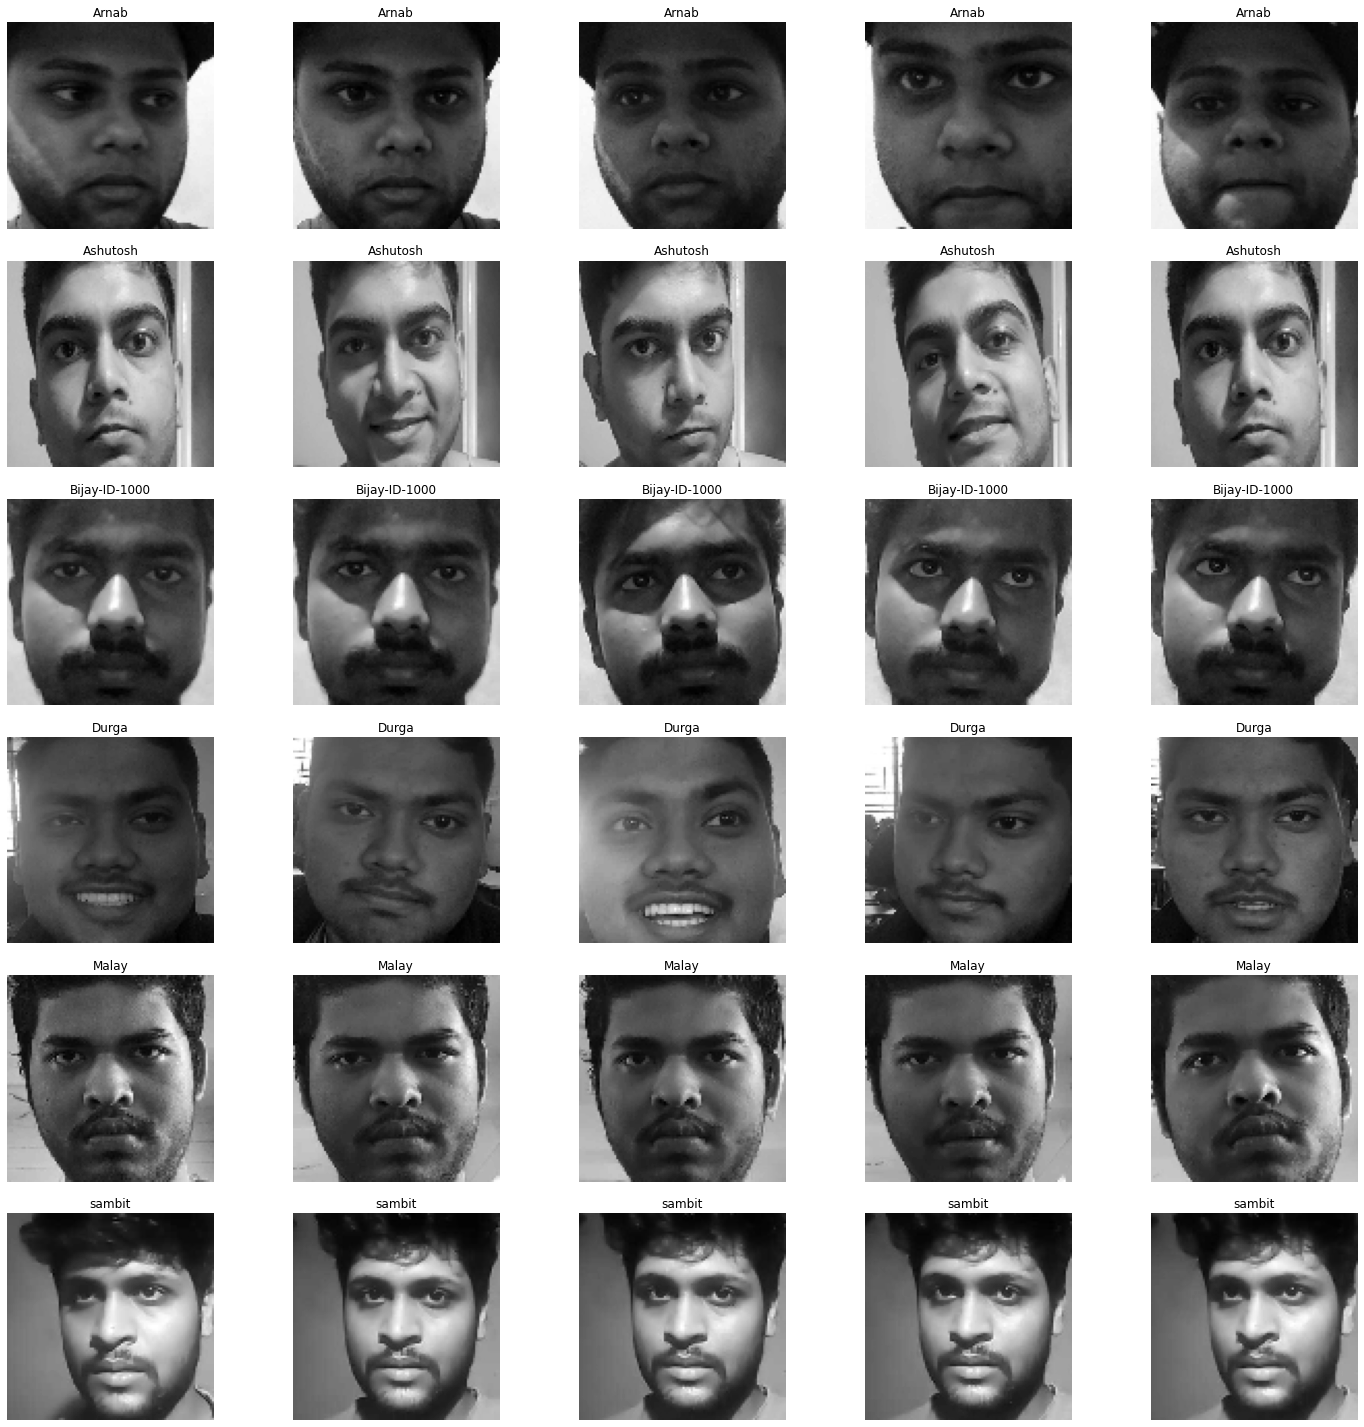

In [41]:
fig,axes = plt.subplots(nrows=n_classes,ncols=5,figsize=(20,20))
fig.tight_layout()

for i in range(n_classes):

  for j in range(5): 
    axes [i][j].imshow(images[labels==i][np.random.randint(0,len(images[labels==i]))],cmap="gray")
    axes[i][j].axis("off")
    axes[i][j].set_title(label_mapping[i])

In [50]:
def preprocess(img):
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [51]:
images = np.array(list(map(preprocess,images)))

In [52]:
print(images.shape)

(594, 100, 100, 1)


In [53]:
xtr,xts,ytr,yts = train_test_split(images,labels,test_size=0.1,random_state=0)

In [54]:
ytr = to_categorical(ytr,n_classes)
yts = to_categorical(yts,n_classes)

In [47]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(100,100,1),strides=2,activation="relu"))
model.add(Conv2D(32,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dense(216,activation="relu"))
model.add(Dense(n_classes,activation="softmax"))
model.compile(RMSprop(learning_rate=1e-4),loss=["categorical_crossentropy"],metrics = ["accuracy"])

In [48]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                  

In [49]:
model.fit(xtr,ytr,epochs=25,verbose=1,validation_data=(xts,yts))

Epoch 1/25
17/17 [==============================] - 5s 245ms/step - loss: 1.5377 - accuracy: 0.3933 - val_loss: 1.1281 - val_accuracy: 0.9667
Epoch 2/25
17/17 [==============================] - 4s 238ms/step - loss: 0.7081 - accuracy: 0.8352 - val_loss: 0.4081 - val_accuracy: 0.9333
Epoch 3/25
17/17 [==============================] - 4s 236ms/step - loss: 0.3165 - accuracy: 0.9288 - val_loss: 0.1777 - val_accuracy: 0.9167
Epoch 4/25
17/17 [==============================] - 4s 240ms/step - loss: 0.1541 - accuracy: 0.9663 - val_loss: 0.0488 - val_accuracy: 1.0000
Epoch 5/25
17/17 [==============================] - 4s 237ms/step - loss: 0.0415 - accuracy: 0.9963 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 6/25
17/17 [==============================] - 4s 242ms/step - loss: 0.1808 - accuracy: 0.9513 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 7/25
17/17 [==============================] - 4s 243ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 

In [55]:
layer0 = Model(model.layers[0].input,model.layers[0].output)

In [56]:
features = layer0.predict(xts[0].reshape(1,100,100,1))

1/1 [==============================] - 0s 47ms/step


In [57]:
features.shape

(1, 48, 48, 32)

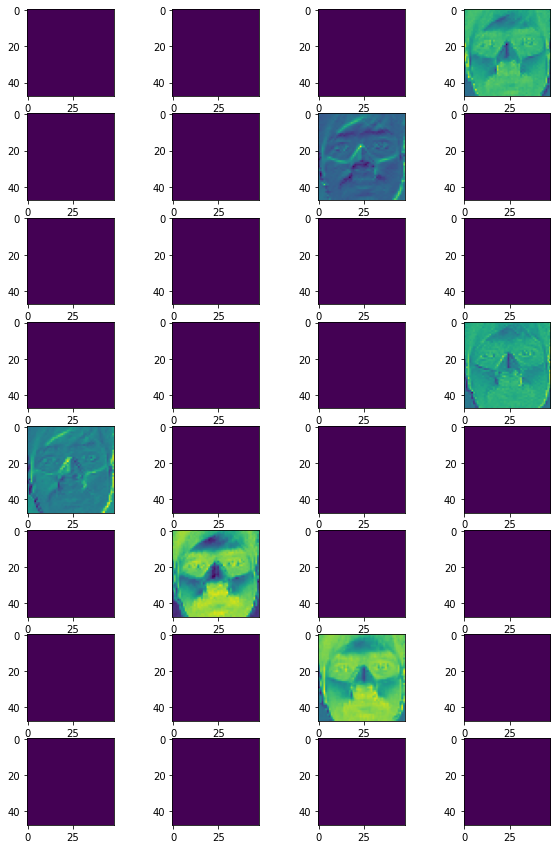

In [58]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8,4,i+1)
  plt.imshow(features[0,:,:,i])

In [29]:
model.save("FACE-DETECT.h5")